# Assignment

1) Delivery_time -> Predict delivery time using sorting time
   Build a simple linear regression model by performing EDA and do necessary transformations and select the best      model using R or Python.

In [30]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [59]:
#Renaming Columns
data1 = data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
data[data.duplicated()].shape #No duplicate Values

(0, 2)

In [11]:
data.isnull().sum() #No Null Values

Delivery Time    0
Sorting Time     0
dtype: int64

In [12]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot: >

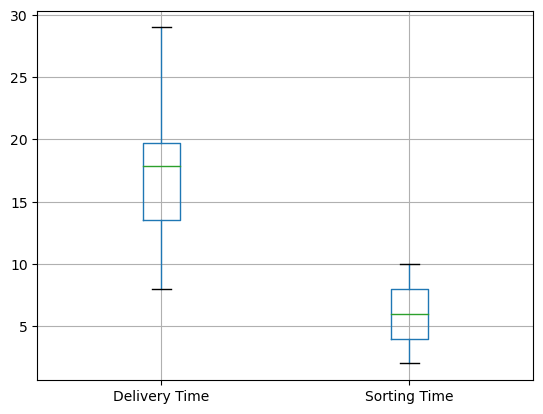

In [13]:
data.boxplot() #we can see there are no outliers

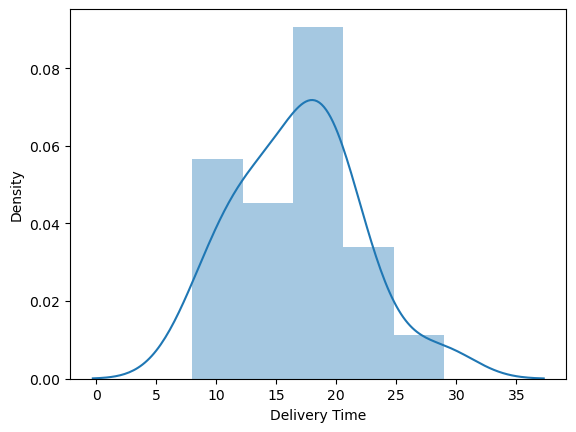

In [35]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['Delivery Time'])
plt.show()

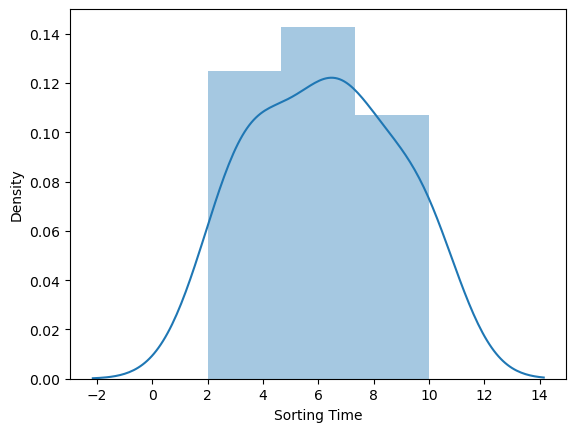

In [36]:
sns.distplot(data['Sorting Time'])
plt.show()

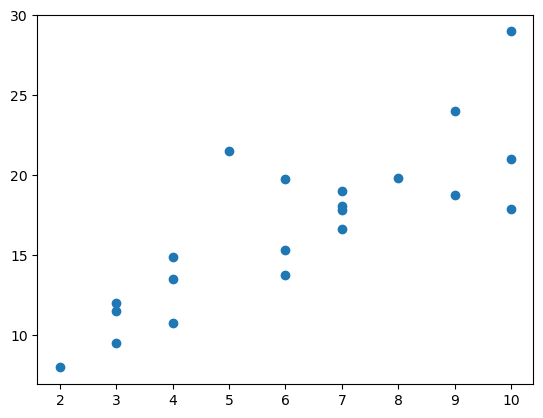

In [49]:
plt.scatter(data['Sorting Time'],data['Delivery Time'])
plt.show()

In [37]:
#Check the Correlation value
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


There is good correlation between the variables

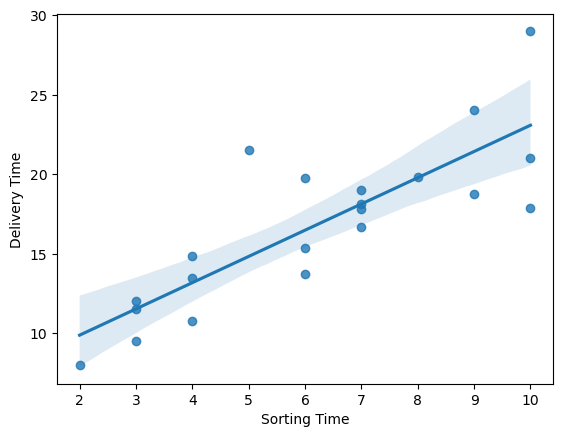

In [52]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])
plt.show()

Build Model

In [60]:
import statsmodels.formula.api as smf
model = smf.ols('delivery_time ~ sorting_time',data=data1).fit()

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        12:48:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
pred = model.predict(data1['sorting_time'])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [79]:
rmse_lin = np.sqrt(np.mean((np.array(data1['delivery_time'])-np.array(pred))**2))
rmse_lin

2.7916503270617654

Here the R-squared value is 0.682
Lets try to increase that value with other transformations

Log Transformation

In [67]:
log_model = smf.ols('delivery_time ~ np.log(sorting_time)',data=data1).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        13:06:47   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
log_pred = log_model.predict(data1['sorting_time'])
log_pred

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [81]:
rmse_log = np.sqrt(np.mean((np.array(data1['delivery_time'])-np.array(log_pred))**2))
rmse_log

2.733171476682066

Here the R-squared value is 0.695
Lets try to increase that value with other transformations

Exponential Transformation

In [68]:
exp_model = smf.ols('np.log(delivery_time) ~ sorting_time',data=data1).fit()
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 15 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                           13:14:23   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
exp_pred = exp_model.predict(data1['sorting_time'])
exp_pred

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [84]:
#we have used log in preparation of the model for target variable so converting it back
exp_pred_main = np.exp(exp_pred)
exp_pred_main

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [85]:
rmse_exp = np.sqrt(np.mean((np.array(data1['delivery_time'])-np.array(exp_pred_main))**2))
rmse_exp

2.940250323056201

Here the R-squared value is 0.711
Lets try to increase that value with other transformations

Quadratic Transformation

In [69]:
data1["sorting_time_square"] = data1.sorting_time*data1.sorting_time
data1

,delivery_time,sorting_time,sorting_time_square
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [71]:
quad_model = smf.ols('np.log(delivery_time) ~ sorting_time+sorting_time_square',data=data1).fit()
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Thu, 15 Dec 2022   Prob (F-statistic):           2.20e-06
Time:                           13:20:17   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time            0.2659      0.080      3.315      0.004       0.097       0.434
sorting_time_square    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
quad_pred = quad_model.predict(data1)
quad_pred

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [88]:
quad_pred_main = np.exp(quad_pred)
quad_pred_main

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [89]:
rmse_quad = np.sqrt(np.mean((np.array(data1['delivery_time'])-np.array(quad_pred_main))**2))
rmse_quad

2.799041988740925

In [ ]:
Here the R-squared value is 0.765

In [91]:
table1 = {"MODEL":pd.Series(["lin","log","exp","quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,log_model.rsquared,exp_model.rsquared,quad_model.rsquared])}
table=pd.DataFrame(table1)
table

,MODEL,RMSE_Values,Rsquare
0,lin,2.791650,0.682271
1,log,2.733171,0.695443
2,exp,2.940250,0.710948
3,quad,2.799042,0.764867


By comparing all the values we can say that quadratic transformation provides better R-squared and also RMSE 
So it is the better model compared to other models

In [92]:
sample_predicted = pd.DataFrame()
sample_predicted['Sorting_Time'] = data1.sorting_time
sample_predicted['Delivery_Time'] = data1.delivery_time
sample_predicted['Predicted_Delivery_Time'] = quad_pred_main

In [93]:
sample_predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,21.646921
1,4,13.50,12.909227
2,6,19.75,16.995933
3,9,24.00,21.176938
4,10,29.00,21.646921
5,6,15.35,16.995933
6,7,19.00,18.764526
7,3,9.50,10.825502
8,10,17.90,21.646921
9,9,18.75,21.176938


The above data set shows the quadratic transformation model predicted values for orginal dataset